<a href="https://colab.research.google.com/github/tutsilianna/Tools_and_Methods_of_math_tech/blob/main/lab4/%D0%98%D0%B8%D0%9C%D0%9C%D0%A2_%D0%9B%D0%A0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №4**


---


**Команда №2:**

*Давыдова Кристина Сергеевна*        
*Поздышева Татьяна Сергеевна*

---



**"Метрические методы классификации."**

*Цель лабораторной работы*: исследовать качество алгоритма классификации в зависимости от характера метрики и других параметров метрического классификатора.

**Постановка задачи:**

1. Разбить данные на обучающую и тестовую выборки (например, в
соотношении 80/20).
2. Обучить алгоритм k ближайших соседей из библиотеки scikit-learn
(KNeighborsClassifier) при различных наборах параметров:

    • Количество соседей n_neighbors: не менее 5 различных значений. Обязательно рассмотреть случай n_neighbors = 1;

    • Вес объектов weights: рассмотреть ’uniform’ и ’distance’;

    • Метрика: метрика городских кварталов (‘cityblock’), евклидова метрика (‘euclidean’) и метрика Чебышева (scipy.spatial.distance.chebyshev).

3. Провести сравнительную оценку качества моделей на основе тестовой выборки. В качестве метрики классификации выбрать любую знакомую метрику (accuracy, precision&recall, F1 и т.д.).
4. Определить модель с наилучшей комбинацией параметров.

## Подключение библиотеки

In [ ]:
import pandas  as pd # Для манипуляции данными
import numpy   as np  # Позволяет использовать новые математические инструменты
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##Читаем необходимых нам файл

In [ ]:
data_frame = pd.read_csv('/content/simple_knn.csv', index_col='Object')
data_frame.head()

,X,Y,Cluster
Object,,,
1,10,17,0
2,9,14,2
3,18,11,2
4,16,12,2
5,8,8,2


##Посмотрим информацию о созданном нами dataset'е

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 36
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   X        32 non-null     int64
 1   Y        32 non-null     int64
 2   Cluster  32 non-null     int64
dtypes: int64(3)
memory usage: 1.0 KB


In [ ]:
# Найдем размер датасета.
data_frame.shape, data_frame.size

((32, 3), 96)

Построим график с помощью параметра "figure.figsize" равным (7,7). На котором изображена точечная диаграмма с помощью библиотеки seaborn, где по оси x расположены значения из столбца "X" датафрейма, по оси y - значения из столбца "Y", и точки различных кластеров обозначены разными цветами в соответствии со столбцом "Cluster".

(0.0, 20.0)

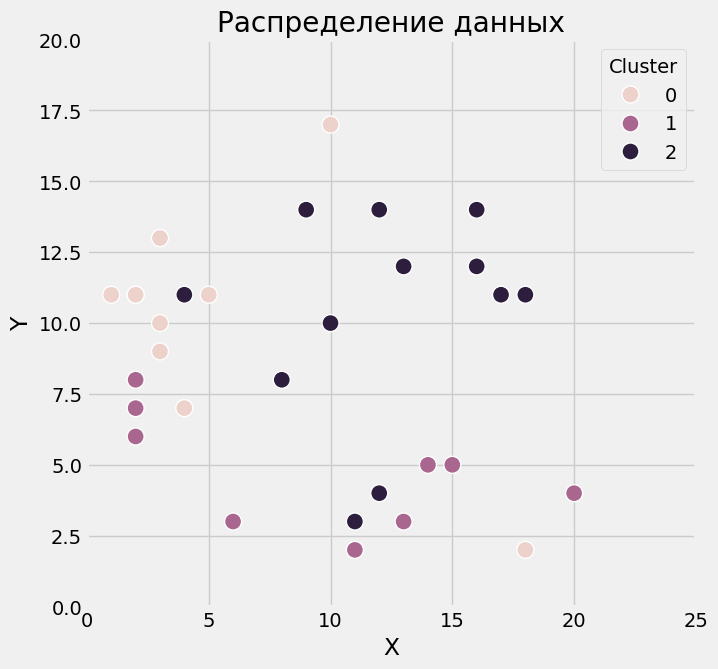

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
sns.scatterplot(x=data_frame.X, y=data_frame.Y, hue=data_frame.Cluster, s=150).set_title('Распределение данных')
plt.xlim(0, 25)
plt.ylim(0, 20)

##Разделение данных на признаки и целевую переменную

In [ ]:
X = data_frame[['X','Y']]
y = data_frame['Cluster']

## Разделим данные на обучающую и тестовую выборки в соотношении 80:20

Функция "train_test_split" разделяет данные на обучающую и тестовую выборки в соотношении 80/20 (test_size=0.8). Обучающие данные сохраняются в массивах `X_train` и `y_train`, а тестовые данные - в массивах `X_test` и `y_test`.

In [ ]:
# из модуля model_selection библиотеки sklearn импортируем функцию train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    #stratify=y,
                                                    random_state=42)

In [ ]:
# выведем исходный размер массива признаков (X)
X.shape

(32, 2)

In [ ]:
# теперь посмотрим, что сделала функция train_test_split
print(X_train.shape, X_test.shape)

(25, 2) (7, 2)


Далее мы построим нашу модель, но уже с учетом вышеописанного разделения на train и test

In [ ]:
from sklearn.linear_model import LinearRegression          # из набора линейных моделей библиотеки sklearn импортируем линейную регрессию


model = LinearRegression()                                 # создадим объект этого класса и запишем в переменную model


model.fit(X_train, y_train)                                # обучим нашу модель т.е. найдем те самые веса или наклон
                                                           # и сдвиг прямой с помощью функции потерь
                                                           # только теперь используем только обучающую выборку

LinearRegression()

Выведем коэффициенты (веса)

Первое значение  -- это коэффициент (вес) для столбца 'X', а второе значение -- это коэффициент (вес) для столбца 'Y'.

Третье значение представляет собой сдвиг (intercept) линейной регрессии.



In [ ]:
# выведем наклон и сдвиг с помощью атрибутов coef_ и intercept_ соответственно
print(model.coef_, model.intercept_)

[0.06966411 0.02379731] 0.2613833529741735


##Обучение алгоритма k ближайших соседей (KNeighborsClassifier) на различных наборах параметров.

В этом коде мы используем вложенные циклы для перебора всех значений параметров n_neighbors, weights и metrics. Внутри каждой комбинации параметров мы создаем и обучаем модель KNeighborsClassifier с этими значениями, делаем прогнозы для тестовой выборки, вычисляем точность модели с использованием метрики accuracy_score и выводим точность для каждой комбинации параметров.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import chebyshev

# Задаем список значений n_neighbors
n_neighbors_values = [1, 2, 3, 4, 5]
weights_values = ['uniform', 'distance']
metrics_values = ['cityblock', 'euclidean', 'chebyshev']

for n in n_neighbors_values:
    for weight in weights_values:
        for metric in metrics_values:
            # Создаем и обучаем модель с текущими значениями параметров
            knn = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn.fit(X_train, y_train)

            # Получаем прогнозы для тестовой выборки
            y_pred = knn.predict(X_test)

            # Вычисляем точность модели
            accuracy = accuracy_score(y_test, y_pred)

            # Выводим точность модели для каждой комбинации параметров
            print('Точность для n_neighbors = {}, weights = {}, metric = {}: {}'.format(n, weight, metric, accuracy))

Точность для n_neighbors = 1, weights = uniform, metric = cityblock: 0.7142857142857143
Точность для n_neighbors = 1, weights = uniform, metric = euclidean: 0.7142857142857143
Точность для n_neighbors = 1, weights = uniform, metric = chebyshev: 0.5714285714285714
Точность для n_neighbors = 1, weights = distance, metric = cityblock: 0.7142857142857143
Точность для n_neighbors = 1, weights = distance, metric = euclidean: 0.7142857142857143
Точность для n_neighbors = 1, weights = distance, metric = chebyshev: 0.5714285714285714
Точность для n_neighbors = 2, weights = uniform, metric = cityblock: 0.5714285714285714
Точность для n_neighbors = 2, weights = uniform, metric = euclidean: 0.5714285714285714
Точность для n_neighbors = 2, weights = uniform, metric = chebyshev: 0.7142857142857143
Точность для n_neighbors = 2, weights = distance, metric = cityblock: 0.7142857142857143
Точность для n_neighbors = 2, weights = distance, metric = euclidean: 0.7142857142857143
Точность для n_neighbors = 

##Провели сравнительную оценку качества моделей на основе тестовой выборки. В качестве метрики классификации выбрали метрику accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Задаем список значений для параметров
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['cityblock', 'euclidean', 'chebyshev']
}

# Создаем модель KNeighborsClassifier
knn = KNeighborsClassifier()

# Инициализируем GridSearchCV с заданными параметрами
grid_search = GridSearchCV(knn, param_grid, cv=6, scoring='accuracy')

# Обучаем GridSearchCV на обучающих данных
grid_search.fit(X_train, y_train)

# Выводим наилучшие значения параметров и точность модели
print('Наилучшие параметры:', grid_search.best_params_)
print('Точность:', grid_search.best_score_)

Наилучшие параметры: {'metric': 'cityblock', 'n_neighbors': 2, 'weights': 'distance'}
Точность: 0.6916666666666668


In [ ]:
print(f'Accuracy для лучшей модели: {accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))}')

Accuracy для лучшей модели: 0.7142857142857143


$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

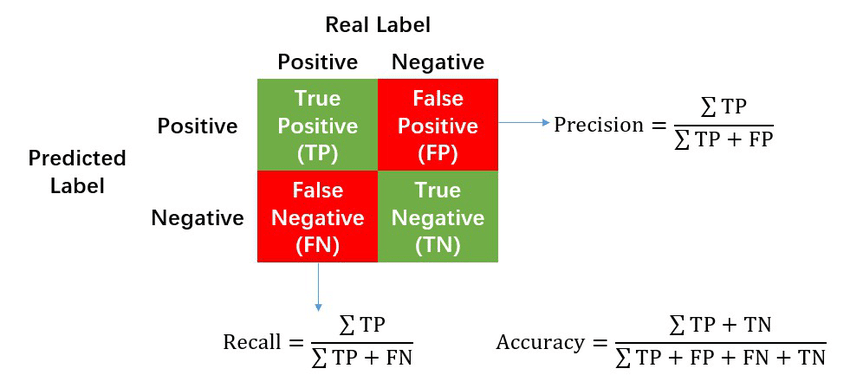

(0.0, 20.0)

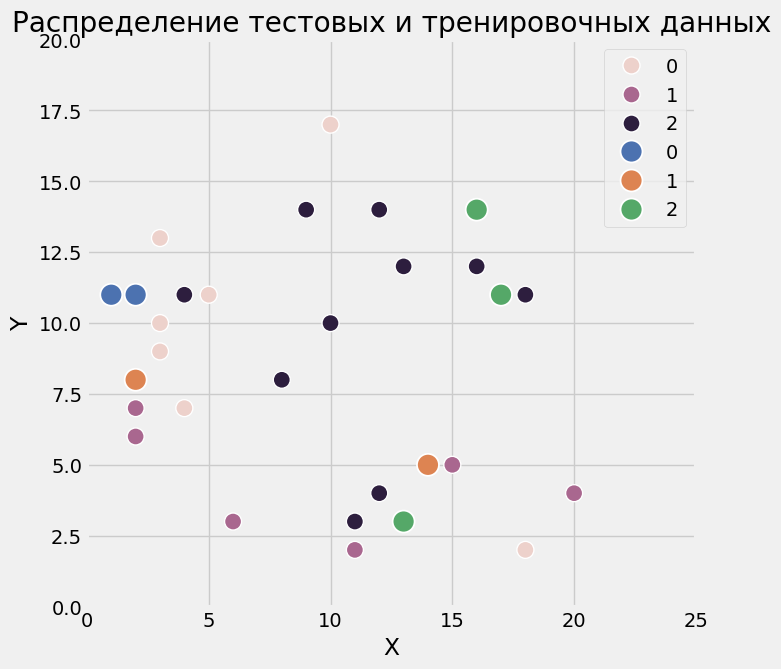

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
sns.scatterplot(x=X_train.X, y=X_train.Y, hue=y_train, s=150).set_title('Распределение тестовых и тренировочных данных')
sns.scatterplot(x=X_test.X, y=X_test.Y, hue=grid_search.best_estimator_.predict(X_test), s=250, palette="deep")
#sns.scatterplot(x=X_test.X, y=X_test.Y, hue=y_test, s=350, palette="deep")
plt.xlim(0, 25)
plt.ylim(0, 20)